In [1]:
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile

# Đường dẫn tới file nén trong Google Drive
zip_path = '/content/drive/MyDrive/datasets/Rice_Image_Dataset.zip'

# Giải nén file vào thư mục trong Colab
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')  # Thư mục này sẽ chứa các ảnh đã giải nén

In [ ]:
#Lấy đường dẫn data
#dataset_path = '/content/drive/MyDrive/Rice_Image_Dataset'
dataset_path = '/content/dataset/Rice_Image_Dataset'

#Tạo 2 mảng rỗng chứa đường dẫn đến file ảnh và nhãn để biết ảnh của
#gạo thuộc loại nào
images = []
labels = []

#Duyệt qua các subfolder trong folder Rice_Image_Dataset
for subfolder in os.listdir(dataset_path):

  #Tạo đường dẫn đến subfolder
  subfoder_path = os.path.join(dataset_path, subfolder)

  #Nếu đường dẫn này không phải folder thì bỏ qua vòng lặp
  if not os.path.isdir(subfoder_path):
    continue;

  #Duyệt qua các ảnh trong subfolder
  for image_filename in os.listdir(subfoder_path):

    #Tạo đường dẫn đến ảnh
    image_path = os.path.join(subfoder_path, image_filename)

    #Thêm đường dẫn ảnh vào mảng
    images.append(image_path)

    #Thêm nhãn ảnh vào mảng
    labels.append(subfolder)

#Tạo pandas DataFrame từ 2 mảng images và labels với header: image, label
df = pd.DataFrame({'image':images, 'label': labels})
print(df.head(10))

                                               image      label
0  /content/dataset/Rice_Image_Dataset/Karacadag/...  Karacadag
1  /content/dataset/Rice_Image_Dataset/Karacadag/...  Karacadag
2  /content/dataset/Rice_Image_Dataset/Karacadag/...  Karacadag
3  /content/dataset/Rice_Image_Dataset/Karacadag/...  Karacadag
4  /content/dataset/Rice_Image_Dataset/Karacadag/...  Karacadag
5  /content/dataset/Rice_Image_Dataset/Karacadag/...  Karacadag
6  /content/dataset/Rice_Image_Dataset/Karacadag/...  Karacadag
7  /content/dataset/Rice_Image_Dataset/Karacadag/...  Karacadag
8  /content/dataset/Rice_Image_Dataset/Karacadag/...  Karacadag
9  /content/dataset/Rice_Image_Dataset/Karacadag/...  Karacadag


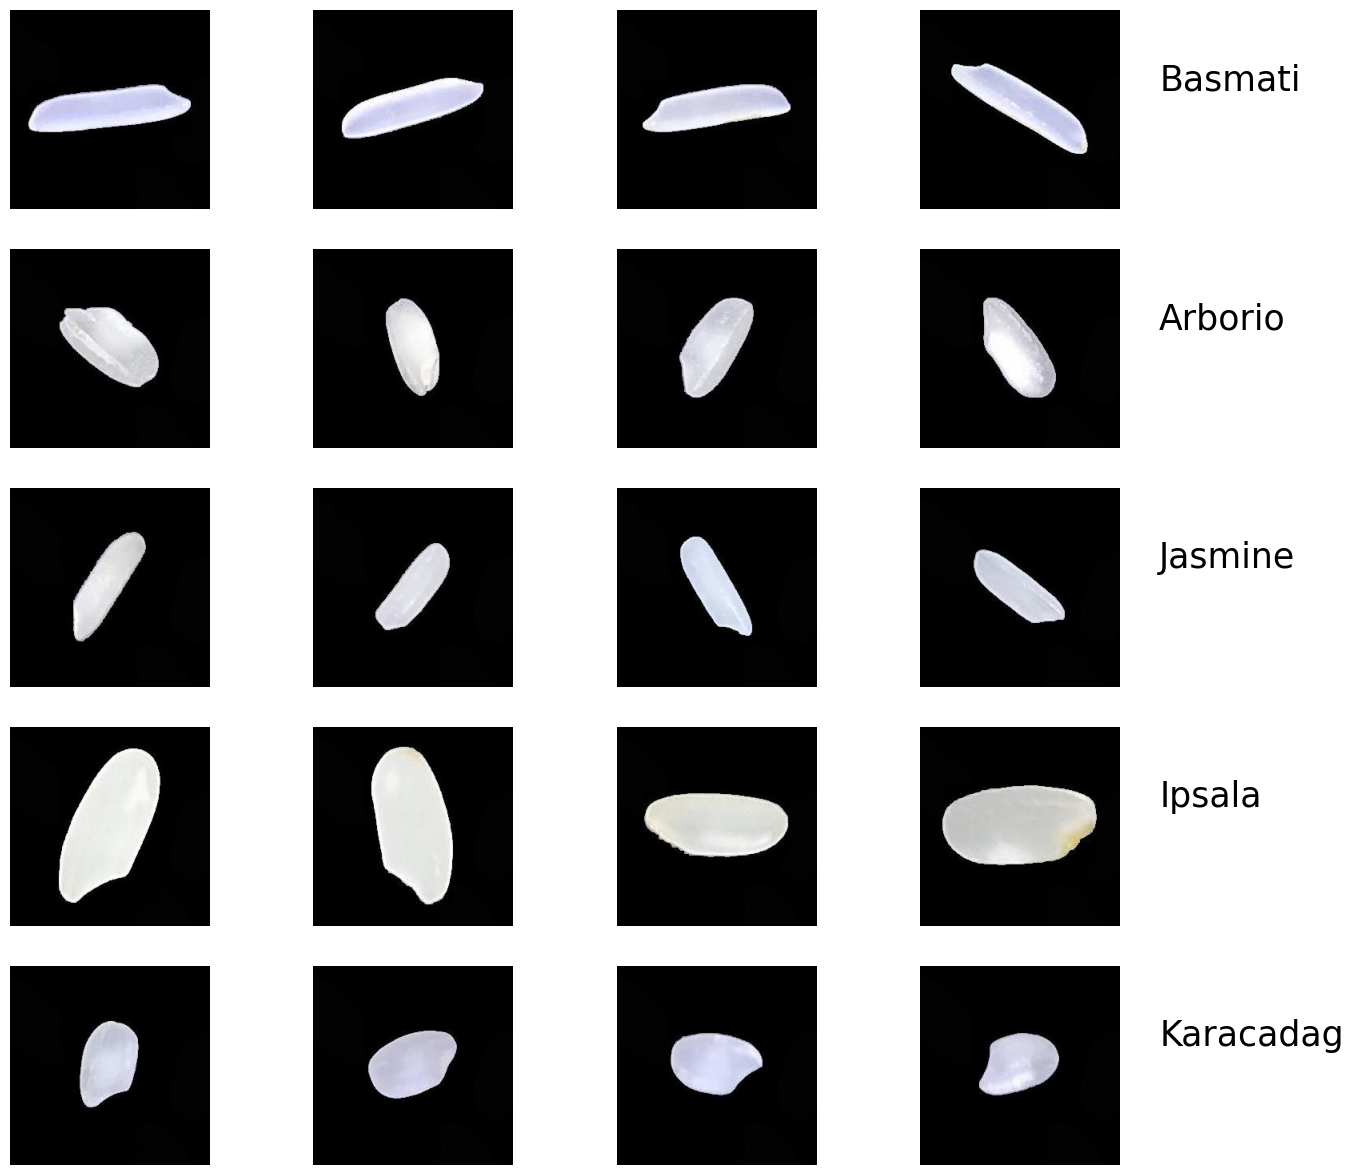

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

#Tạo kích thước hiển thị và grid
fig = plt.figure(figsize=(15,15))

#Grid gồm 5 dòng, 4 cột, kích thước là fig
gs = GridSpec(5, 4, figure=fig)

#Duyệt qua các label đơn nhất trong DataFrame (5 nhãn là 5 loại gạo)
#Với i: chỉ số, category: tên nhãn
#enumeration: thêm chỉ số cho label
for i, category in enumerate(df['label'].unique()):

  #Lấy 4 đường dẫn ảnh của mỗi loại
  filepaths = df[df['label'] == category]['image'].values[:4]

  #Thêm các ảnh từ filepaths vào mỗi ô trong grid
  for j, filepath in enumerate(filepaths):
    ax = fig.add_subplot(gs[i, j])

    #Dùng matpolib đọc ảnh thông qua đường dẫn, dùng seaborn để hiển thị
    ax.imshow(plt.imread(filepath))

    #Ẩn đường lưới
    ax.axis('off')

  #Thêm nhãn cho các ảnh
  #Vị trí x=300, y=100, fontsize=25, color=black
  ax.text(300, 100, category, fontsize=25, color='k')

plt.show()

Saving Arborio (9).jpg to Arborio (9).jpg
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


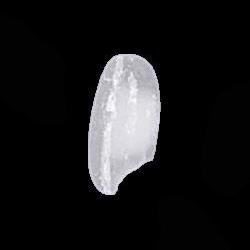

In [ ]:
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow

#Tải ảnh lên google colab sẽ nhận được 1 dictionary với key và đường dẫn ảnh
file_uploaded = files.upload()

# Lấy file ảnh cuối cùng trong các file ảnh từ dictionary thông qua key
for fn in file_uploaded.keys():
    filename = fn

#cv2 đọc ảnh thành 1 mảng numpy
img_upload = cv2.imread(filename)
print(img_upload)

#Hiển thị ảnh
cv2_imshow(img_upload)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Chia dữ liệu thành 60% train, 40% test + validation
X_train, X_val_test, y_train, y_val_test = train_test_split(df['image'], df['label'], test_size=0.4, random_state=42)

#Chia 40% test + validation thành 20% validation, 20% test
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

#Tạo dataframe cho tập train
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

#Tạo dataframe cho tập validation
df_val = pd.DataFrame({'image': X_val, 'label': y_val})

#Tạo dataframe cho tập test
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

#Mã hóa các nhãn
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

#In thử
print(df_train.head(10))
print(df_val.head(10))
print(df_test.head(10))

                                                   image      label
32295  /content/dataset/Rice_Image_Dataset/Basmati/ba...    Basmati
52211  /content/dataset/Rice_Image_Dataset/Arborio/Ar...    Arborio
74243  /content/dataset/Rice_Image_Dataset/Ipsala/Ips...     Ipsala
66369  /content/dataset/Rice_Image_Dataset/Ipsala/Ips...     Ipsala
7611   /content/dataset/Rice_Image_Dataset/Karacadag/...  Karacadag
29632  /content/dataset/Rice_Image_Dataset/Jasmine/Ja...    Jasmine
36778  /content/dataset/Rice_Image_Dataset/Basmati/ba...    Basmati
0      /content/dataset/Rice_Image_Dataset/Karacadag/...  Karacadag
71032  /content/dataset/Rice_Image_Dataset/Ipsala/Ips...     Ipsala
37741  /content/dataset/Rice_Image_Dataset/Basmati/ba...    Basmati
                                                   image      label
58858  /content/dataset/Rice_Image_Dataset/Arborio/Ar...    Arborio
70786  /content/dataset/Rice_Image_Dataset/Ipsala/Ips...     Ipsala
55336  /content/dataset/Rice_Image_Dataset/Arbor

In [ ]:
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
# Đặt kích thước ảnh và kích thước batch
image_size = (125, 125)
batch_size = 32

# Tạo ImageDataGenerator để tiền xử lý
datagen = ImageDataGenerator(

    #Chuẩn hóa giá trị pixel của ảnh về khoảng [0, 1]
    rescale=1./255,

    #Tạo ra các ảnh mới bằng cách xoay ảnh gốc một góc ngẫu nhiên từ -45 đến 45 độ.
    rotation_range=45,

    #Dịch chuyển ảnh gốc theo chiều ngang một khoảng ngẫu nhiên tối đa là 20% chiều rộng của ảnh
    width_shift_range=0.2,

    #Dịch chuyển ảnh gốc theo chiều dọc một khoảng ngẫu nhiên tối đa là 20% chiều cao của ảnh
    height_shift_range=0.2,

    #Biến dạng ảnh gốc theo hiệu ứng cắt xén (shear) một góc ngẫu nhiên tối đa là 20 độ.
    shear_range=0.2,

    #Phóng to hoặc thu nhỏ ảnh gốc một tỷ lệ ngẫu nhiên tối đa là 20%.
    zoom_range=0.2,

    #Tạo ra các ảnh mới bằng cách lật ảnh gốc theo chiều ngang.
    horizontal_flip=True,

    #Xử lý các pixel mới được tạo ra do các phép biến đổi trên bằng cách lấp đầy chúng với giá trị của pixel gần nhất.
    fill_mode='nearest'
)


# Tạo ra một bộ sinh dữ liệu ảnh cho tập validation
train_generator = datagen.flow_from_dataframe(

    #DataFrame chứa thông tin về ảnh và nhãn tương ứng.
    df_train,

    #Cột chứa ảnh
    x_col='image',

    #Cột chứa nhãn
    y_col='label',

    #Kích thước ảnh sau khi được đọc và xử lý.
    target_size=image_size,

    #Số lượng ảnh trong mỗi batch.
    batch_size=batch_size,

    #Nhãn là dạng phân loại nhiều lớp.
    class_mode='sparse',

    #Xáo trộn dữ liệu trước khi tạo mỗi batch.
    shuffle=True
)

# Tạo ra một bộ sinh dữ liệu ảnh cho tập train
val_generator = datagen.flow_from_dataframe(
    df_val,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Tạo ra một bộ sinh dữ liệu ảnh cho tập test
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 45000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


In [ ]:
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import warnings
warnings.filterwarnings('ignore')
from keras._tf_keras.keras import losses

#Đặt kích thước ảnh đầu vào cho model: 125 x 125 pixel, 3 chiều (màu)
input_shape = (125, 125, 3)

#Tạo model CNN
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
#Chọn optimizer: adam
#Chọn hàm mất mát: Sparse Categorical Crossentropy
#metrics: dùng đánh giá mô hình

model.compile(
    optimizer='adam',
    loss= losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
#Thông số model CNN
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 125, 125, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 62, 62, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       1,843,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,867,557 (7.12 MB)

 Trainable params: 1,867,557 (7.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Huấn luyện model với tập train và giám sát bằng tập val
history = model.fit(train_generator, epochs=5, validation_data=val_generator)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1066s 756ms/step - accuracy: 0.7520 - loss: 0.6068 - val_accuracy: 0.9567 - val_loss: 0.1314
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1079s 739ms/step - accuracy: 0.9484 - loss: 0.1454 - val_accuracy: 0.9694 - val_loss: 0.0881
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1042s 739ms/step - accuracy: 0.9682 - loss: 0.0886 - val_accuracy: 0.9766 - val_loss: 0.0708
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1044s 741ms/step - accuracy: 0.9766 - loss: 0.0688 - val_accuracy: 0.9829 - val_loss: 0.0484
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1077s 723ms/step - accuracy: 0.9793 - loss: 0.0610 - val_accuracy: 0.9878 - val_loss: 0.0377


FileNotFoundError: [Errno 2] No such file or directory: '/content/model/model_rc_cnn.keras'

In [ ]:
#Lưu mô hình lại
model.save('/content/drive/MyDrive/model_rc_cnn.keras')

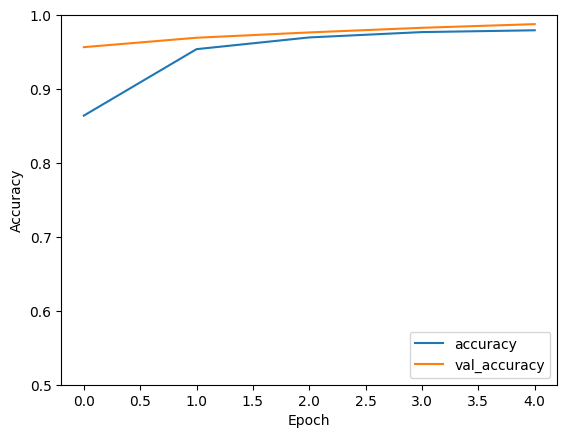

In [ ]:
import matplotlib.pyplot as plt

#Đồ thị phản ánh độ chính xác qua mỗi epoch
#accuracy: Đánh giá trên tập huấn luyện
#val_accuracy: Đánh giá trên tập validation

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Hiển thị độ chính xác của mô hình trên tập test
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc * 100:.2f}%")

469/469 ━━━━━━━━━━━━━━━━━━━━ 158s 336ms/step - accuracy: 0.9889 - loss: 0.0343
Test Accuracy: 98.74%


In [ ]:
#Test với 10 ảnh Jasmine
from tensorflow import expand_dims
from keras.src.utils import load_img, img_to_array
import numpy as np

for i in range(1,10):
    img = load_img(f'/content/dataset/Rice_Image_Dataset/Jasmine/Jasmine ({i}).jpg', target_size=(125, 125))  # Kích thước ảnh phù hợp với model

    #Chuyển ảnh thành mảng
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Chuẩn hóa ảnh
    img_array = expand_dims(img_array, 0)  # Tạo batch

    #Tạo nhãn
    class_names = ['Arborio','Basmati','Ipsala','Jasmine','Karacadag']

    #Dùng model dự đoán
    predictions = model.predict(img_array)

    #Mảng dự đoán
    print(predictions)

    #Lấy giá trị lớn nhất trong mảng
    predicted_class_index = np.argmax(predictions)

    #Xác định nhãn tương ứng
    predicted_class = class_names[predicted_class_index]
    print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[2.8517024e-04 1.8729105e-03 3.1734617e-06 9.9783736e-01 1.4209405e-06]]
Jasmine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[2.4173254e-04 5.3829729e-04 1.0138531e-05 9.9920976e-01 3.1733865e-08]]
Jasmine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[2.5410232e-05 1.4087020e-03 2.7856081e-06 9.9856275e-01 3.3663119e-07]]
Jasmine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[5.7037341e-06 2.6699882e-03 1.6498439e-06 9.9732274e-01 1.1969399e-08]]
Jasmine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[7.0401625e-04 5.7174574e-04 9.4407396e-06 9.9871457e-01 2.7318984e-07]]
Jasmine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[2.5760285e-03 2.7293318e-03 2.8193704e-04 9.9434596e-01 6.6733031e-05]]
Jasmine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[7.5225523e-07 7.0850961e-03 3.5304970e-07 9.9291372e-01 1.6426291e-09]]
Jasmine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[3.2936616e-04 3.6302134e-03 5.6617184e-05 9.9598324e-01 6.5066803e-07]]
Jasmine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[